In [1]:
%matplotlib inline
import numpy as np
from scipy.misc import imread
import pickle
import matplotlib.pyplot as plt
from scipy.misc import imread
import tensorflow as tf
from keras.preprocessing import image
from keras.backend.tensorflow_backend import set_session
from ssd import SSD300
from keras.applications.imagenet_utils import preprocess_input
from ssd_utils import BBoxUtility

np.set_printoptions(suppress=True)
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.45
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
NYU_CLASSES =  ['bed', 'shelf', 'computer', 'plate', 'lamp', 'chair', 'garbage_bin', 'table', 'sofa', 'box','person'
]
NUM_CLASSES = len(NYU_CLASSES) + 1
input_shape = (300, 300, 3) #channel last

In [3]:
# model = SSD300(input_shape, num_classes=NUM_CLASSES)
# model.load_weights('../checkpoints/SUNRGBD/weights.best.hdf5')

In [4]:
gt = pickle.load(open('../pkls/SUNRGBD/RGB.pkl', 'rb'))
keys = sorted(gt.keys())
num_train = int(round(0.8 * len(keys)))
train_keys = keys[:num_train]
val_keys = keys[num_train:]
num_val = len(val_keys)

In [5]:
path_prefix = '../dataset/'
inputs = []
images = []
img_path = path_prefix + sorted(val_keys)[250]
img = image.load_img(img_path)
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
inputs = preprocess_input(np.array(inputs))

# img_path = path_prefix + sorted(keys)[3]
# img = image.load_img(img_path)
# img = image.img_to_array(img)

In [6]:
# priors = pickle.load(open('../pkls/prior_boxes_ssd300.pkl', 'rb'))
# bbox_util = BBoxUtility(NUM_CLASSES, priors)
# preds = model.predict(inputs, batch_size=1, verbose=1)
# results = bbox_util.detection_out(preds)

In [7]:
#train_keys[0]
results = gt[val_keys[250]]
print(results[0])

[ 0.02469136  0.75760927  0.47742177  1.03278689  0.          0.          1.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


(441, 591, 3)


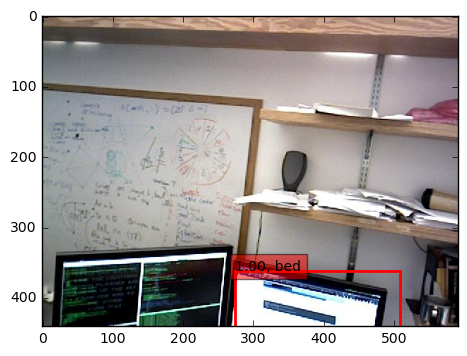

In [8]:
        
# colors = plt.cm.hsv(np.linspace(0, 1, 12)).tolist()
# currentAxis = plt.gca()
# plt.imshow(img / 255.)
# for array in results:
#     top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.8]
#     xmin = int(round(array[0] * img.shape[1]))
#     ymin = int(round(array[1] * img.shape[0]))
#     xmax = int(round(array[2] * img.shape[1]))
#     ymax = int(round(array[3] * img.shape[0]))
#     label = int(top_indices[0])
#     label_name = NYU_CLASSES[label - 1]
#     display_txt = '{:0.2f}, {}'.format(score, label_name)
#     coords = (xmin, ymin), xmax, ymax
#     color = colors[label]
#     currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
#     currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})

# plt.show()
        
colors = plt.cm.hsv(np.linspace(0, 1, 12)).tolist()
currentAxis = plt.gca()
plt.imshow(img / 255.)
# for array in results:

print(img.shape)
xmin = int(round(results[1][0] * img.shape[1]))
ymin = int(round(results[1][1] * img.shape[0]))
xmax = int(round(results[1][2] * img.shape[1])) 
ymax = int(round(results[1][3] * img.shape[0]))
label = 0
a= xmax-xmin
label_name = NYU_CLASSES[label]
display_txt = '{:0.2f}, {}'.format(1, label_name)
coords = (xmin, ymin),  xmax-xmin, ymax-ymin
color = colors[label]
currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})

plt.show()

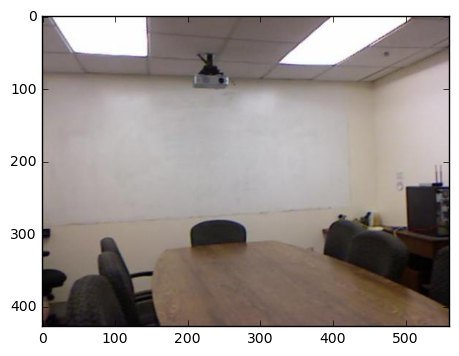

In [149]:
plt.imshow(img/255.)